In [68]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.model_selection import train_test_split

In [69]:
# 데이터 다운로드 및 전처리
data_url = "https://www.openml.org/data/download/22102133/dataset"
data = pd.read_csv(data_url, sep=",", skiprows=43, header=None)
data.columns = ['Species','Length1','Length2','Length3','Height','Width', 'Weight(target)']

data

,Species,Length1,Length2,Length3,Height,Width,Weight(target)
0,Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
1,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532
2,Bream,720.0,32.0,35.0,40.6,16.3618,6.0900
3,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515
4,Bream,850.0,32.8,36.0,41.6,16.8896,6.1984
...,...,...,...,...,...,...,...
130,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
131,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
132,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
133,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [70]:
# Perch 종에 해당하는 데이터만 선택
perch_data = data[data['Species'] == 'Perch']
  # 모든 종을 한 번에 계산하면 test와 train 종이 완전 달라져서 이상한 값이 나옴...

# 설명변수(X)와 종속변수(y) 선택
#X = data[['Height', 'Width']]
#y = data['Weight(target)']
X = perch_data[['Height', 'Width']]
y = perch_data['Weight(target)']

# train 데이터셋과 test 데이터셋으로 분할 (train:test = 9:1)
#train_size = int(len(data) * 0.9)
train_size = int(len(perch_data) * 0.9)

# train 데이터셋과 test 데이터셋을 분할합니다.
#train_data = data.iloc[:train_size]
#test_data = data.iloc[train_size:]
train_data = perch_data.iloc[:train_size]
test_data = perch_data.iloc[train_size:]

# 설명 변수(X)와 종속 변수(y)를 분할합니다.
X_train = train_data[['Height', 'Width']]
y_train = train_data['Weight(target)']

X_train, y_train

(    Height    Width
 48     8.8   2.1120
 49    14.7   3.5280
 50    16.0   3.8240
 51    17.2   4.5924
 52    18.5   4.5880
 53    19.2   5.2224
 54    19.4   5.1992
 55    20.2   5.6358
 56    20.8   5.1376
 57    21.0   5.0820
 58    22.5   5.6925
 59    22.5   5.9175
 60    22.5   5.6925
 61    22.8   6.3840
 62    23.5   6.1100
 63    23.5   5.6400
 64    23.5   6.1100
 65    23.5   5.8750
 66    23.5   5.5225
 67    24.0   5.8560
 68    24.0   6.7920
 69    24.2   5.9532
 70    24.5   5.2185
 71    25.0   6.2750
 72    25.5   7.2930
 73    25.5   6.3750
 74    26.2   6.7334
 75    26.5   6.4395
 76    27.0   6.5610
 77    28.0   7.1680
 78    28.7   8.3230
 79    28.9   7.1672
 80    28.9   7.0516
 81    28.9   7.2828
 82    29.4   7.8204
 83    30.1   7.5852
 84    31.6   7.6156
 85    34.0  10.0300
 86    36.5  10.2565
 87    37.3  11.4884
 88    39.0  10.8810
 89    38.3  10.6091
 90    39.4  10.8350
 91    39.3  10.5717
 92    41.4  11.1366
 93    41.4  11.1366
 94    41.3  

In [71]:
X_test = test_data[['Height', 'Width']]
y_test = test_data['Weight(target)']

X_test, y_test

(     Height    Width
 98     42.5  11.1350
 99     44.6  12.8002
 100    45.2  11.9328
 101    45.5  12.5125
 102    46.0  12.6040
 103    46.6  12.4888,
 98     6.6300
 99     6.8684
 100    7.2772
 101    7.4165
 102    8.1420
 103    7.5958
 Name: Weight(target), dtype: float64)

In [72]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
#절편값
print("절편값 : ", model.intercept_)

#가중치
print("가중치 : ", model.coef_)

절편값 :  -0.2422631977034957
가중치 :  [0.03869479 0.49163709]


In [74]:
# 모델 평가: 결정계수 확인
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)

Train R^2 Score: 0.9639342400036512
Test R^2 Score: 0.21244937701432653


In [75]:
def predict(x, model=None):
    return sum(model.coef_ * x) + model.intercept_

for i in range(10, 16):
    print(f'index: {i}', predict(perch_data.iloc[i, [4, 6]], model=model), perch_data.iloc[[i], -1].values[0])

index: 10 2.376139464440224 3.555
index: 11 2.2544592840867765 3.3075
index: 12 2.4314486373281543 3.6675
index: 13 2.3774235228196114 3.534
index: 14 2.342317784382053 3.4075
index: 15 2.4000851427316694 3.525


In [76]:
for i in range(50, 56):
    print(f'index: {i}', predict(perch_data.iloc[i, [4, 6]], model=model), perch_data.iloc[[i], -1].values[0])

index: 50 4.661819344608205 6.63
index: 51 4.860284688650661 6.8684
index: 52 5.0844828066350285 7.2772
index: 53 5.164576290916063 7.4165
index: 54 5.540606396937454 8.142000000000001
index: 55 5.295291091739832 7.5958


In [77]:
# 회귀식 출력
coefficients = model.coef_
intercept = model.intercept_
print("회귀식: y =", coefficients[0], "* Height +", coefficients[1], "* Width +", intercept)

회귀식: y = 0.03869479106156058 * Height + 0.4916370923371607 * Width + -0.2422631977034957


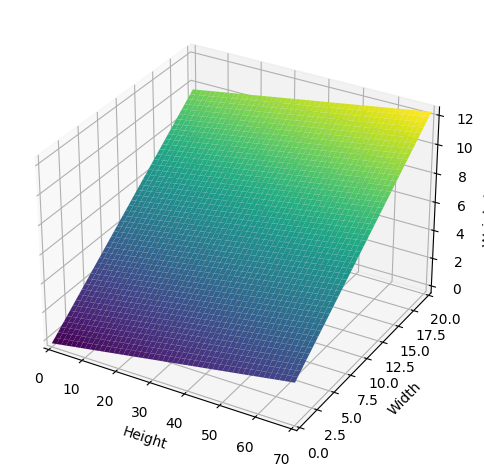

In [78]:
from sympy import symbols, exp, Function, Max, Piecewise, Matrix
from sympy.plotting import plot, plot3d, PlotGrid
from sympy.functions.elementary.hyperbolic import tanh
from sympy.printing.latex import LatexPrinter, print_latex

# 독립 변수 생성
x, y = symbols('x y')

# 회귀식
def regression_eq(x, y):
    return 0.03869479106156058 * x + 0.4916370923371607 * y + -0.2422631977034957

# 3차원 도표 생성
p1 = plot3d(regression_eq(x, y), (x, 0, 70), (y, 0, 20), xlabel='Height', ylabel='Width', zlabel='Weight(target)', show=False)

# 3차원 도표 표시
PlotGrid(1, 1, p1)

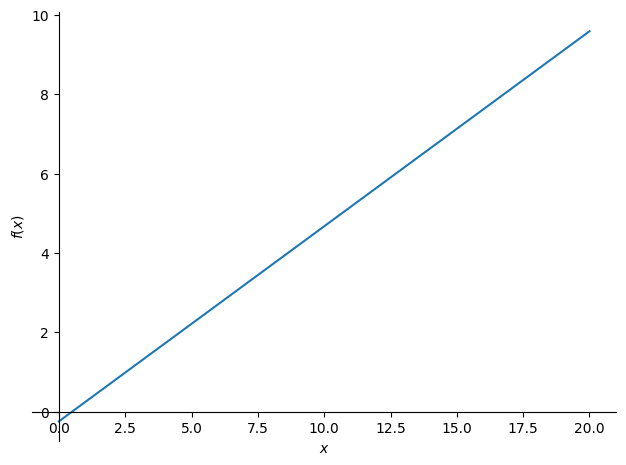

In [79]:
# single plot
def g(x):
    return 0.4916370923371607 * x + -0.2422631977034957

plot(g(x), (x, 0, 20))

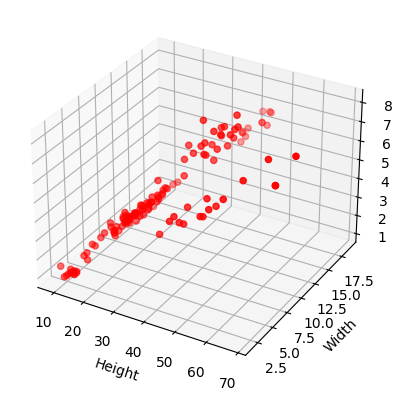

In [80]:
# 3차원 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트 플로팅
ax.scatter(data['Height'], data['Width'], data['Weight(target)'], c='r', marker='o')

# 축 및 레이블 설정
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight(target)')

plt.show()